<a href="https://colab.research.google.com/github/kake08/chembl_ml/blob/main/code/CDD_ML_Part_2_Bioinformatics_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Handling molecular data using Python
RDKit is an open-source software toolkit for cheminformatics, designed to assist in the analysis and design of small molecules and chemical compounds. It provides a set of libraries and tools for the manipulation and analysis of molecular structures, molecular descriptors, molecular fingerprints, molecular similarity, molecular visualization, and more. The toolkit is widely used in academia, as well as in the pharmaceutical, biotech, and chemical industries for a variety of tasks such as virtual screening, lead optimization, and chemical database management.

In [4]:
!pip install rdkit

In [5]:
import pandas as pd
# this is generated from part 1
df = pd.read_csv('bioactivity_data_preprocessed.csv')

In [6]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [7]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [8]:
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL480,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,390.0,active
1,CHEMBL178459,Cc1c(-c2cnccn2)ssc1=S,210.0,active
2,CHEMBL3545157,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,80.0,active
3,CHEMBL297453,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...,1580.0,intermediate
4,CHEMBL4303595,O=C1C=Cc2cc(Br)ccc2C1=O,40.0,active
...,...,...,...,...
5295,CHEMBL6065869,COc1cccc2[nH]c(C(=O)N(C)[C@@H](CC(C)C)C(=O)N3C...,100.0,active
5296,CHEMBL5958100,COc1cccc2[nH]c(C(=O)N(C)[C@@H](CC(C)(C)F)C(=O)...,550.0,active
5297,CHEMBL6031391,C#C[C@@H]1C[C@@]2(CN1C(=O)[C@H](CC(C)C)N(C)C(=...,100.0,active
5298,CHEMBL5820046,CC(C)C[C@@H](C(=O)N1C[C@]2(CC1C#N)C(=O)Nc1cccc...,100.0,active


In [9]:
df = df.dropna(subset=['canonical_smiles'])

In [10]:
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL480,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,390.0,active
1,CHEMBL178459,Cc1c(-c2cnccn2)ssc1=S,210.0,active
2,CHEMBL3545157,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,80.0,active
3,CHEMBL297453,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...,1580.0,intermediate
4,CHEMBL4303595,O=C1C=Cc2cc(Br)ccc2C1=O,40.0,active
...,...,...,...,...
5295,CHEMBL6065869,COc1cccc2[nH]c(C(=O)N(C)[C@@H](CC(C)C)C(=O)N3C...,100.0,active
5296,CHEMBL5958100,COc1cccc2[nH]c(C(=O)N(C)[C@@H](CC(C)(C)F)C(=O)...,550.0,active
5297,CHEMBL6031391,C#C[C@@H]1C[C@@]2(CN1C(=O)[C@H](CC(C)C)N(C)C(=...,100.0,active
5298,CHEMBL5820046,CC(C)C[C@@H](C(=O)N1C[C@]2(CC1C#N)C(=O)Nc1cccc...,100.0,active


In [11]:
df_norm = df.reset_index(drop=True)
display(df_norm.head())

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL480,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,390.0,active
1,CHEMBL178459,Cc1c(-c2cnccn2)ssc1=S,210.0,active
2,CHEMBL3545157,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,80.0,active
3,CHEMBL297453,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...,1580.0,intermediate
4,CHEMBL4303595,O=C1C=Cc2cc(Br)ccc2C1=O,40.0,active


In [12]:
df_norm

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL480,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,390.0,active
1,CHEMBL178459,Cc1c(-c2cnccn2)ssc1=S,210.0,active
2,CHEMBL3545157,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,80.0,active
3,CHEMBL297453,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...,1580.0,intermediate
4,CHEMBL4303595,O=C1C=Cc2cc(Br)ccc2C1=O,40.0,active
...,...,...,...,...
5284,CHEMBL6065869,COc1cccc2[nH]c(C(=O)N(C)[C@@H](CC(C)C)C(=O)N3C...,100.0,active
5285,CHEMBL5958100,COc1cccc2[nH]c(C(=O)N(C)[C@@H](CC(C)(C)F)C(=O)...,550.0,active
5286,CHEMBL6031391,C#C[C@@H]1C[C@@]2(CN1C(=O)[C@H](CC(C)C)N(C)C(=...,100.0,active
5287,CHEMBL5820046,CC(C)C[C@@H](C(=O)N1C[C@]2(CC1C#N)C(=O)Nc1cccc...,100.0,active


In [13]:
df_lipinski = lipinski(df_norm.canonical_smiles)

# Missing values in canonical_simles column are dropped before passing through
#  lipinski function

In [14]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,369.368,3.51522,1.0,4.0
1,226.351,3.30451,0.0,5.0
2,334.400,3.26220,0.0,5.0
3,458.375,2.23320,8.0,11.0
4,237.052,2.22770,0.0,2.0
...,...,...,...,...
5284,530.625,3.37740,1.0,5.0
5285,531.588,3.76988,2.0,5.0
5286,526.637,3.81170,1.0,4.0
5287,473.577,3.25728,2.0,4.0


In [15]:
df_lipinski.shape

(5289, 4)

In [16]:
df_combined = pd.concat([df_norm,df_lipinski], axis=1)

In [17]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL480,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,390.0,active,369.368,3.51522,1.0,4.0
1,CHEMBL178459,Cc1c(-c2cnccn2)ssc1=S,210.0,active,226.351,3.30451,0.0,5.0
2,CHEMBL3545157,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,80.0,active,334.400,3.26220,0.0,5.0
3,CHEMBL297453,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...,1580.0,intermediate,458.375,2.23320,8.0,11.0
4,CHEMBL4303595,O=C1C=Cc2cc(Br)ccc2C1=O,40.0,active,237.052,2.22770,0.0,2.0
...,...,...,...,...,...,...,...,...
5284,CHEMBL6065869,COc1cccc2[nH]c(C(=O)N(C)[C@@H](CC(C)C)C(=O)N3C...,100.0,active,530.625,3.37740,1.0,5.0
5285,CHEMBL5958100,COc1cccc2[nH]c(C(=O)N(C)[C@@H](CC(C)(C)F)C(=O)...,550.0,active,531.588,3.76988,2.0,5.0
5286,CHEMBL6031391,C#C[C@@H]1C[C@@]2(CN1C(=O)[C@H](CC(C)C)N(C)C(=...,100.0,active,526.637,3.81170,1.0,4.0
5287,CHEMBL5820046,CC(C)C[C@@H](C(=O)N1C[C@]2(CC1C#N)C(=O)Nc1cccc...,100.0,active,473.577,3.25728,2.0,4.0


### Converting IC50 values from standard_value to pIC50 (negative logarithmic scale by multiplying it by 10^-9) then take this molar value and apply -log10. Then replace standard value column(IC50) with pIC50 column

In [18]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value', axis=1)

    return x

In [19]:
# before passing to pIC50 function
df_combined.standard_value.describe()

,standard_value
count,5289.000000
mean,17104.834687
std,38472.869323
min,0.010000
25%,105.000000
50%,920.000000
75%,8667.000000
max,500000.000000


Dont need to normalize as max value is < 100_000_000

In [20]:
df_final = pIC50(df_combined)
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL480,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,active,369.368,3.51522,1.0,4.0,6.408935
1,CHEMBL178459,Cc1c(-c2cnccn2)ssc1=S,active,226.351,3.30451,0.0,5.0,6.677781
2,CHEMBL3545157,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,active,334.400,3.26220,0.0,5.0,7.096910
3,CHEMBL297453,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...,intermediate,458.375,2.23320,8.0,11.0,5.801343
4,CHEMBL4303595,O=C1C=Cc2cc(Br)ccc2C1=O,active,237.052,2.22770,0.0,2.0,7.397940
...,...,...,...,...,...,...,...,...
5284,CHEMBL6065869,COc1cccc2[nH]c(C(=O)N(C)[C@@H](CC(C)C)C(=O)N3C...,active,530.625,3.37740,1.0,5.0,7.000000
5285,CHEMBL5958100,COc1cccc2[nH]c(C(=O)N(C)[C@@H](CC(C)(C)F)C(=O)...,active,531.588,3.76988,2.0,5.0,6.259637
5286,CHEMBL6031391,C#C[C@@H]1C[C@@]2(CN1C(=O)[C@H](CC(C)C)N(C)C(=...,active,526.637,3.81170,1.0,4.0,7.000000
5287,CHEMBL5820046,CC(C)C[C@@H](C(=O)N1C[C@]2(CC1C#N)C(=O)Nc1cccc...,active,473.577,3.25728,2.0,4.0,7.000000


In [21]:
df_final.pIC50.describe()

,pIC50
count,5289.000000
mean,5.955217
std,1.202856
min,3.301030
25%,5.062131
50%,6.036212
75%,6.978811
max,11.000000


In [22]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL480,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,active,369.368,3.51522,1.0,4.0,6.408935
1,CHEMBL178459,Cc1c(-c2cnccn2)ssc1=S,active,226.351,3.30451,0.0,5.0,6.677781
2,CHEMBL3545157,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,active,334.400,3.26220,0.0,5.0,7.096910
4,CHEMBL4303595,O=C1C=Cc2cc(Br)ccc2C1=O,active,237.052,2.22770,0.0,2.0,7.397940
6,CHEMBL55400,Nc1ccc2cc3ccc(N)cc3nc2c1,active,209.252,2.55240,2.0,3.0,6.443697
...,...,...,...,...,...,...,...,...
5284,CHEMBL6065869,COc1cccc2[nH]c(C(=O)N(C)[C@@H](CC(C)C)C(=O)N3C...,active,530.625,3.37740,1.0,5.0,7.000000
5285,CHEMBL5958100,COc1cccc2[nH]c(C(=O)N(C)[C@@H](CC(C)(C)F)C(=O)...,active,531.588,3.76988,2.0,5.0,6.259637
5286,CHEMBL6031391,C#C[C@@H]1C[C@@]2(CN1C(=O)[C@H](CC(C)C)N(C)C(=...,active,526.637,3.81170,1.0,4.0,7.000000
5287,CHEMBL5820046,CC(C)C[C@@H](C(=O)N1C[C@]2(CC1C#N)C(=O)Nc1cccc...,active,473.577,3.25728,2.0,4.0,7.000000


# EDA (Chemical Space Analysis) via Lipinski descriptors

In [23]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

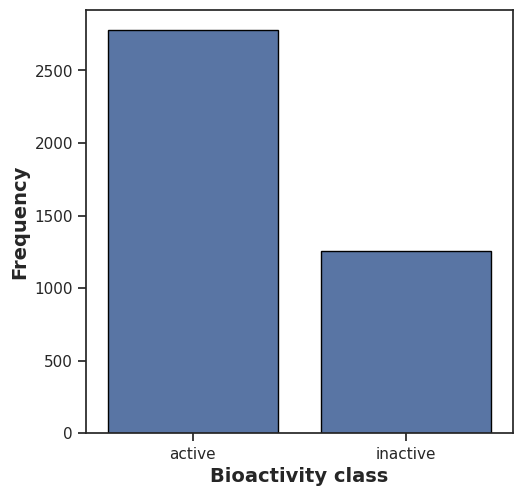

In [24]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

# Scatter plot of Molecular Weight vs LogP

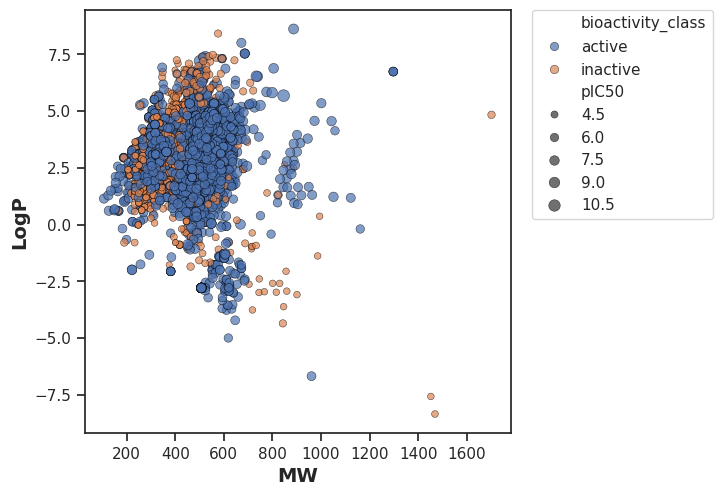

In [25]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

# Box plots

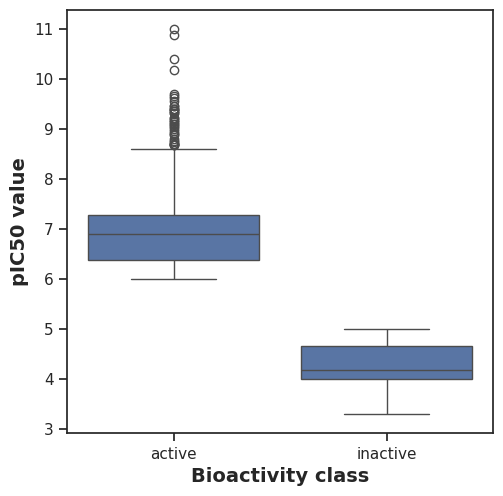

In [26]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

# Statistical analysis | Mann-Whitney U Test

In [27]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [28]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,3484866.0,0.0,0.05,Different distribution (reject H0)


# MW


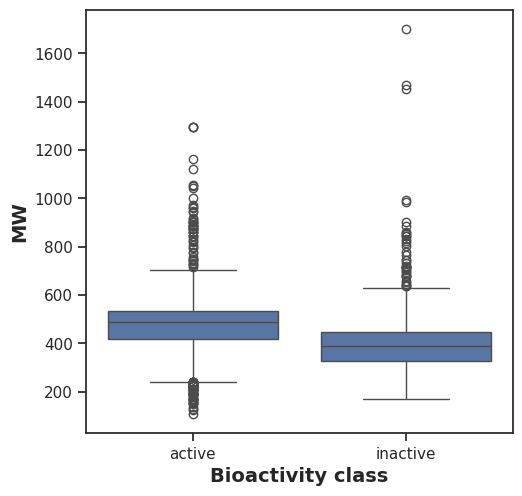

In [29]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [30]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,2485255.5,1.931222e-104,0.05,Different distribution (reject H0)


# LogP


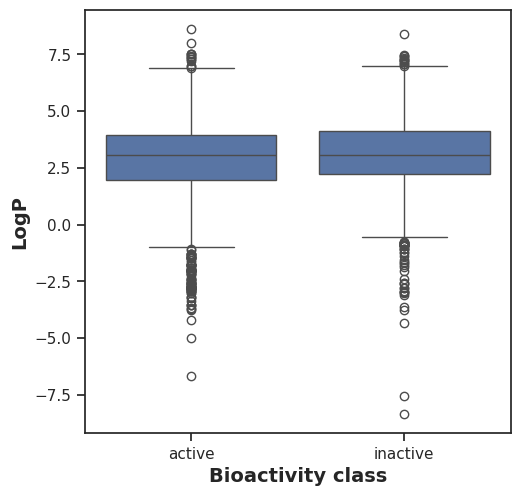

In [31]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [32]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,1636260.0,0.001922,0.05,Different distribution (reject H0)


# NumHDonors

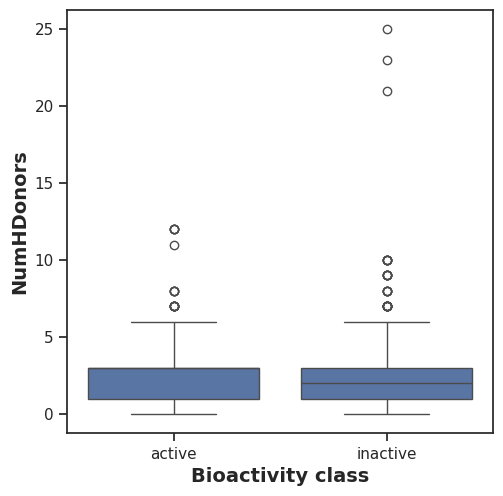

In [33]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [34]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,1876205.0,0.000065,0.05,Different distribution (reject H0)


# NumHAcceptors

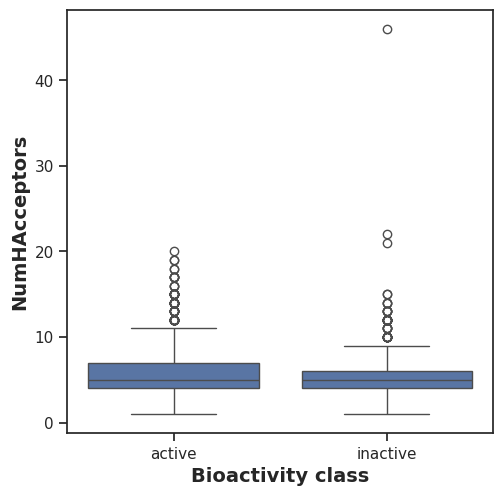

In [35]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')


In [36]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,2025303.5,4.747708e-17,0.05,Different distribution (reject H0)


# Interpretation of Statistical Results

The statistical analysis, supported by box plots and Mann-Whitney U test results, reveals significant differences in the physicochemical properties between active and inactive compounds in the dataset. For pIC50, the very low p-value (0.0) indicates a strong statistical difference, with active compounds exhibiting generally higher pIC50 values, signifying greater potency. Similarly, for Molecular Weight (MW), a p-value of 1.93e-104 demonstrates a highly significant distinction. The box plot for MW suggests that active compounds tend to have lower molecular weights. For LogP, a p-value of 0.001922 indicates a significant difference, with active compounds generally showing slightly lower lipophilicity. These findings suggest that compounds with higher potency, lower molecular weight, and moderate lipophilicity are more likely to be active.

Further analysis of hydrogen bonding descriptors also shows significant differences. The Mann-Whitney U test for NumHDonors yielded a p-value of 0.000065, while for NumHAcceptors, the p-value was 4.75e-17. Both indicate statistically significant differences between active and inactive groups. The corresponding box plots reveal that active compounds generally possess fewer hydrogen bond donors and acceptors compared to inactive compounds. These trends align with Lipinski's Rule of Five, where a lower count of hydrogen bond donors and acceptors, along with optimal molecular weight and lipophilicity, are often associated with better drug-likeness and oral bioavailability. In summary, all five descriptors analyzed (pIC50, MW, LogP, NumHDonors, and NumHAcceptors) are statistically significant in differentiating active from inactive compounds, highlighting their importance in determining bioactivity.

## Summary:

The statistical analysis reveals significant differences between active and inactive compounds across all analyzed descriptors. Active compounds tend to exhibit higher pIC50 values (indicating greater potency), lower molecular weights, and lower LogP values (less lipophilicity). Additionally, active compounds generally possess fewer hydrogen bond donors and acceptors compared to inactive compounds. These trends suggest that smaller, less lipophilic molecules with fewer hydrogen bonding capabilities are more likely to be active.

### Data Analysis Key Findings
*   All five physicochemical descriptors (pIC50, Molecular Weight, LogP, NumHDonors, and NumHAcceptors) show statistically significant differences (p < 0.05) between active and inactive compounds.
*   For pIC50, a very low p-value (0.0) indicates that active compounds generally have higher pIC50 values, signifying greater potency.
*   For Molecular Weight, a p-value of 1.93e-104 shows that active compounds tend to have lower molecular weights.
*   For LogP, a p-value of 0.001922 indicates that active compounds generally exhibit slightly lower lipophilicity.
*   For hydrogen bonding descriptors, NumHDonors (p-value of 0.000065) and NumHAcceptors (p-value of 4.75e-17) both show that active compounds generally possess fewer donors and acceptors.

### Insights or Next Steps
*   The findings highlight a profile for active compounds characterized by higher potency, lower molecular weight, moderate lipophilicity, and fewer hydrogen bond donors/acceptors, which aligns with Lipinski's Rule of Five for drug-likeness.
*   This information can be used to guide the selection and design of new compounds, prioritizing those that fit this physicochemical profile to increase the likelihood of discovering new active compounds.


In [42]:
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL480,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,active,369.368,3.51522,1.0,4.0,6.408935
1,CHEMBL178459,Cc1c(-c2cnccn2)ssc1=S,active,226.351,3.30451,0.0,5.0,6.677781
2,CHEMBL3545157,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,active,334.400,3.26220,0.0,5.0,7.096910
4,CHEMBL4303595,O=C1C=Cc2cc(Br)ccc2C1=O,active,237.052,2.22770,0.0,2.0,7.397940
6,CHEMBL55400,Nc1ccc2cc3ccc(N)cc3nc2c1,active,209.252,2.55240,2.0,3.0,6.443697
...,...,...,...,...,...,...,...,...
5284,CHEMBL6065869,COc1cccc2[nH]c(C(=O)N(C)[C@@H](CC(C)C)C(=O)N3C...,active,530.625,3.37740,1.0,5.0,7.000000
5285,CHEMBL5958100,COc1cccc2[nH]c(C(=O)N(C)[C@@H](CC(C)(C)F)C(=O)...,active,531.588,3.76988,2.0,5.0,6.259637
5286,CHEMBL6031391,C#C[C@@H]1C[C@@]2(CN1C(=O)[C@H](CC(C)C)N(C)C(=...,active,526.637,3.81170,1.0,4.0,7.000000
5287,CHEMBL5820046,CC(C)C[C@@H](C(=O)N1C[C@]2(CC1C#N)C(=O)Nc1cccc...,active,473.577,3.25728,2.0,4.0,7.000000


In [41]:
df_2class.to_csv('bioactivity_data_preprocessed.csv', index=False)

In [37]:
! zip -r results.zip . -i *.csv *.pdf

  adding: plot_bioactivity_class.pdf (deflated 39%)
  adding: mannwhitneyu_pIC50.csv (deflated 8%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 10%)
  adding: plot_NumHDonors.pdf (deflated 39%)
  adding: plot_NumHAcceptors.pdf (deflated 39%)
  adding: plot_ic50.pdf (deflated 35%)
  adding: bioactivity_data_preprocessed.csv (deflated 86%)
  adding: mannwhitneyu_MW.csv (deflated 10%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 10%)
  adding: plot_LogP.pdf (deflated 37%)
  adding: plot_MW.pdf (deflated 36%)
  adding: plot_MW_vs_LogP.pdf (deflated 2%)
  adding: mannwhitneyu_LogP.csv (deflated 9%)
